In [ ]:
# This is the start of my code I will be making a decsion tree predicitng fatal car crashes 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 

# start of prediciotn modle will look to identify trends

df = pd.read_csv('2015washington.csv')
df.replace('', 'NaN', inplace=True)
df.replace('NaN', 0, inplace=True)
fatal = df[df['FATAL_COUNT']>= 1]
fatal_count = (df['FATAL_COUNT']>= 1).value_counts()
print(fatal_count)
fatal_time = fatal['HOUR_OF_DAY']
avg = fatal_time.mean()
#rint(fatal_time)
# AVG Time = 13
# times before 6 and later than 15 / all fatal accidents occur 
drug = df['ILLEGAL_DRUG_RELATED']
#print(drug.describe())
#print(fatal.describe())
night = df[(df['HOUR_OF_DAY']>= 15) & (df['HOUR_OF_DAY']<= 4)]
nightD_test = night['FATAL_COUNT']
night_D = night[night['FATAL_COUNT']>= 1].value_counts()
#print(night_D)
#print(night.describe())

FATAL_COUNT
False    1909
True       21
Name: count, dtype: int64


Accuracy: 0.9948186528497409
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       384
        True       0.00      0.00      0.00         2

    accuracy                           0.99       386
   macro avg       0.50      0.50      0.50       386
weighted avg       0.99      0.99      0.99       386



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

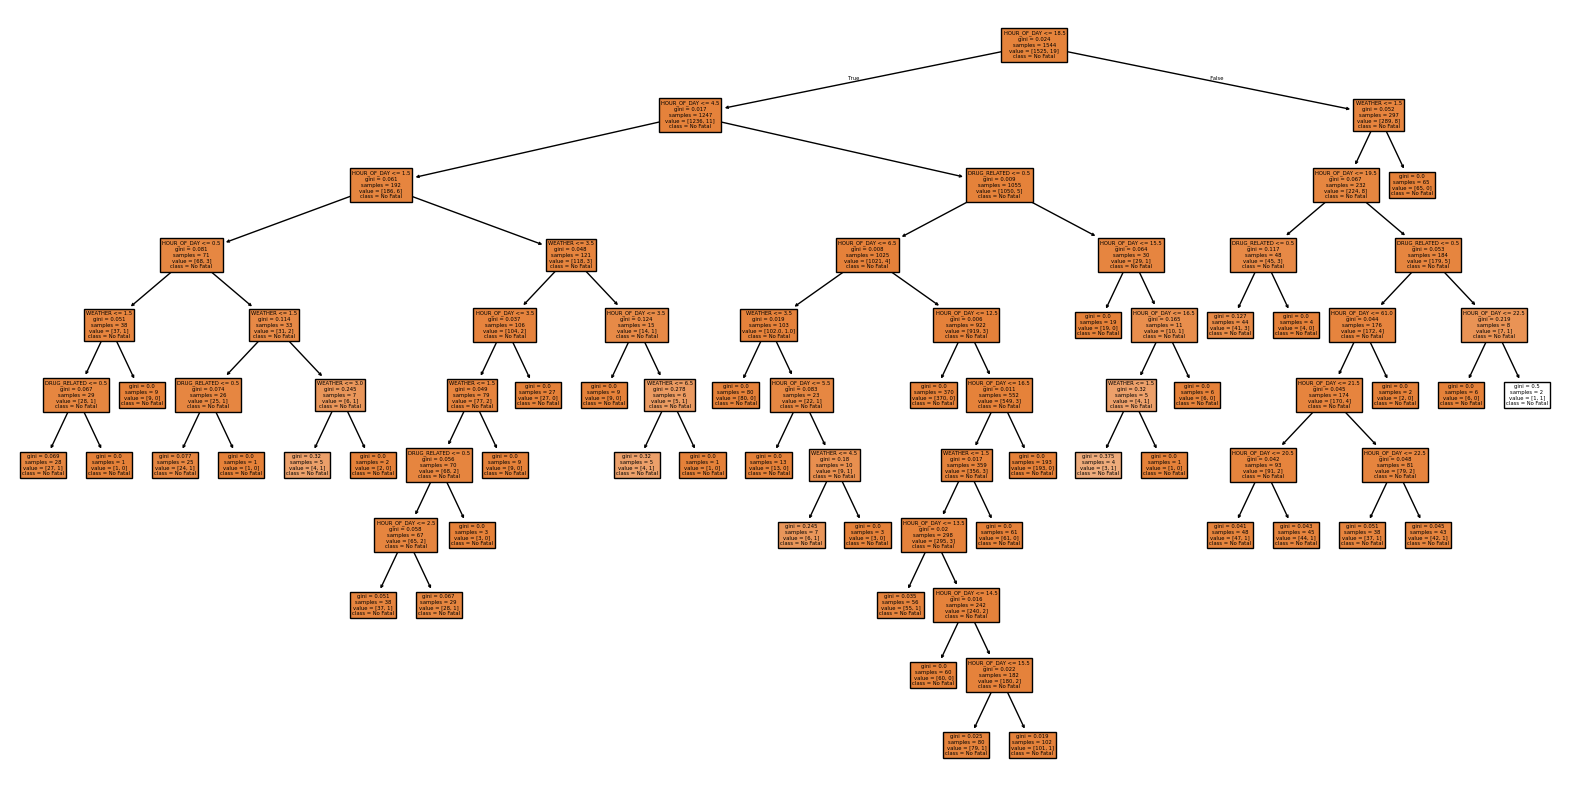

In [33]:
#Decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
#clean data 
df = pd.read_csv('2015washington.csv')
df.replace('', 'NaN', inplace=True)
df.replace('NaN', 0, inplace=True)
#print(df.describe())
X = df[['HOUR_OF_DAY','WEATHER','DRUG_RELATED']]
Y= (df['FATAL_COUNT']>=1)
#changed training set to 0.99 becuase there is only 21 cases in 2000 where people die, but still unable to rpedict fatal accidents 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Fatal', 'Fatal'])
plt.show()
# does not work, from this we learn that we can anot use weather, time, and drug use to predict fatal accidents



In [37]:
# looking for trends so I can better create a new decision tree that can predict more fatal accidents then my previous one
df = pd.read_csv('2015washington.csv')
df.replace('', 'NaN', inplace=True)
df.replace('NaN', 0, inplace=True)
test = df[(df['FATAL_COUNT']>=1)]
time_day = test[(test['HOUR_OF_DAY']>= 15) | (test['HOUR_OF_DAY']<= 4)]
print(time_day)


       CRASH_CRN  DISTRICT  CRASH_COUNTY  MUNICIPALITY POLICE_AGCY  \
85    2015008387        12            62         62225       68B01   
155   2015014531        12            62         62429       68B02   
440   2015033782        12            62         62225       68B01   
547   2015042426        12            62         62203       68B01   
553   2015042995        12            62         62405       68T09   
780   2015060794        12            62         62301       62301   
814   2015063327        12            62         62223       62422   
1004  2015076292        12            62         62302       62302   
1031  2015078342        12            62         62201       68B01   
1134  2015084823        12            62         62223       62422   
1158  2015085832        12            62         62223       68B03   
1168  2015086972        12            62         62405       62405   
1271  2015093753        12            62         62206       62206   
1555  2015114493    

In [ ]:
# this is the end of my work below are just differt things I messed around with

In [3]:
import pandas as  pd 
import numpy as np
import re as re 
import mysql.connector as mysql
from mysql.connector import Error
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 's_crash'
}
connect = mysql.connect(**db_config)
cursor = connect.cursor()
cursor.execute("use s_crash; insert into s_crash{df} ")


In [10]:
df = pd.read_csv('2015washington.csv')
#print(df.columns)

test = df[df['PERSON_COUNT']>=1]
x= df.loc[df['PERSON_COUNT']]
print(x)



     CRASH_CRN  DISTRICT  CRASH_COUNTY  MUNICIPALITY POLICE_AGCY  CRASH_YEAR  \
3   2015000376        12            62         62406       62406        2015   
2   2015000317        12            62         62227       62227        2015   
2   2015000317        12            62         62227       62227        2015   
3   2015000376        12            62         62406       62406        2015   
2   2015000317        12            62         62227       62227        2015   
..         ...       ...           ...           ...         ...         ...   
1   2015000212        12            62         62227       62227        2015   
2   2015000317        12            62         62227       62227        2015   
2   2015000317        12            62         62227       62227        2015   
1   2015000212        12            62         62227       62227        2015   
3   2015000376        12            62         62406       62406        2015   

    CRASH_MONTH  DAY_OF_WEEK  TIME_OF_D

In [9]:
moter = df['MOTORCYCLE_COUNT'].value_counts().sort_index()
print(moter)

MOTORCYCLE_COUNT
0    1863
1      65
2       2
Name: count, dtype: int64


In [37]:
monthC = df['CRASH_MONTH'].value_counts().sort_index()
dayc = df['DAY_OF_WEEK'].value_counts().sort_index()
test = df[['CRASH_MONTH','DAY_OF_WEEK']]
test2 = test.value_counts().sort_index()
test3 = test.groupby(['CRASH_MONTH'])
test4 = test3.value_counts().sort_index()
test_counts = test.groupby(['CRASH_MONTH', 'DAY_OF_WEEK']).size().reset_index(name='count')
#with open('output.txt', 'w') as f:
   # f.write(test4.to_string())  
sorted_test = test_counts.sort_values(by='count', ascending=False)
w = sorted_test.head(10)
sorted_test2 = w.sort_values(by='CRASH_MONTH', ascending=True)
print(sorted_test2)



    CRASH_MONTH  DAY_OF_WEEK  count
6             1            7     54
1             1            2     33
4             1            5     31
13            2            7     37
11            2            5     33
16            3            3     33
18            3            5     32
55            8            7     36
68           10            6     32
82           12            6     32


In [38]:
for _, row in sorted_test2.iterrows():  # '_' is used to ignore the index
    if int(row['count']) > 35:
        print(row['CRASH_MONTH'], row['DAY_OF_WEEK'], row['count'])

# most crashes are sundays in january 
        


1 7 54
2 7 37
8 7 36


In [47]:
new = df[['WEATHER', 'SPEED_LIMIT','MOTORCYCLE_COUNT', 'FATAL_COUNT', 'MAJ_INJ_COUNT']]
new2 = new[new['FATAL_COUNT']>0]
new2.head()

,WEATHER,SPEED_LIMIT,MOTORCYCLE_COUNT,FATAL_COUNT,MAJ_INJ_COUNT
85,1,45.0,0,1,1
155,1,55.0,0,3,0
440,1,55.0,0,1,0
520,4,65.0,0,1,0
547,4,65.0,0,1,0


<Axes: xlabel='WEATHER'>

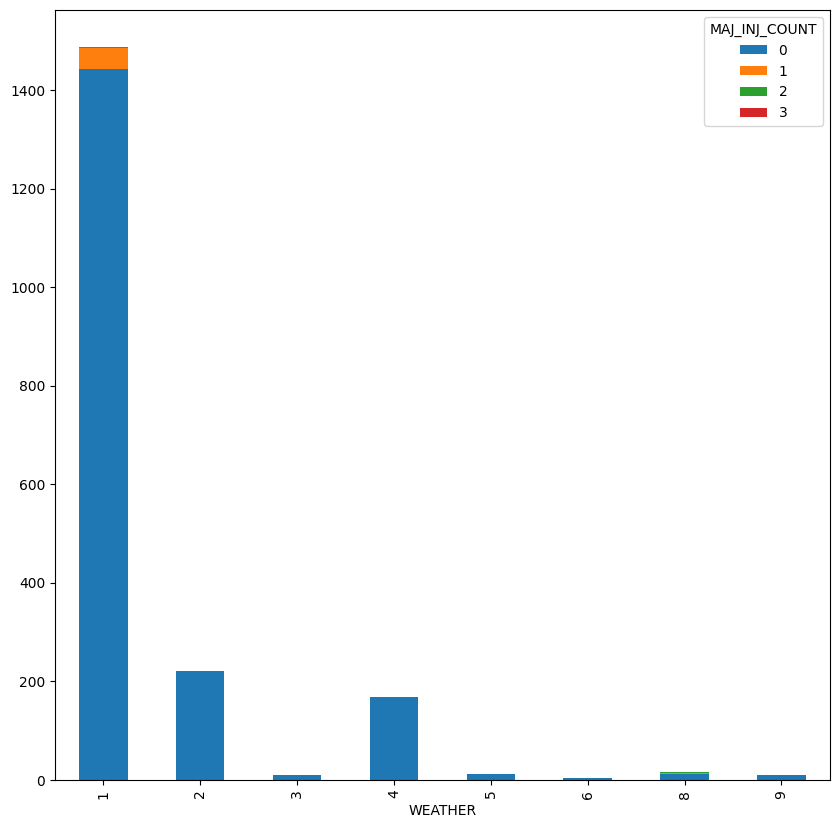

In [50]:
import matplotlib as p 
we = df[['WEATHER', 'MAJ_INJ_COUNT']]
weinj = we.groupby('WEATHER').value_counts().unstack(fill_value=0)
#weinj.head()

weinj.plot(kind='bar', stacked=True, figsize=(10,10))
